<a href="https://colab.research.google.com/github/VishalPrem1994/AIGenPlayGround/blob/main/Base_Model_Run_With_Control_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install openai numpy opencv-python accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers diffusers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
BASEPATH = '/content/drive/MyDrive/stable_diffusion_weights'

In [9]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, StableDiffusionControlNetPipeline, DDIMScheduler, ControlNetModel
from IPython.display import display
from diffusers.utils import load_image
torch.cuda.empty_cache()

In [13]:
controlnet = ControlNetModel.from_pretrained(
    "fusing/stable-diffusion-v1-5-controlnet-openpose", torch_dtype=torch.float16
)


In [20]:
model_path = BASEPATH+"/Mark2"           
print(model_path)  # If you want to use previously trained model saved in gdrive, replace this with the full path of model in gdrive
pipe = StableDiffusionControlNetPipeline.from_pretrained(model_path,controlnet=controlnet, safety_checker=None, torch_dtype=torch.float16).to("cuda")

/content/drive/MyDrive/stable_diffusion_weights/Mark2


You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [21]:
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()

In [32]:
urls = [
    
    "https://firebasestorage.googleapis.com/v0/b/controlnet-poses-65adc.appspot.com/o/ControlnetPoses%2F1682049682582?alt=media&token=5e966bbd-db18-44a7-b166-1fe3ad0be2e7",
    "https://firebasestorage.googleapis.com/v0/b/controlnet-poses-65adc.appspot.com/o/ControlnetPoses%2F1682010483523?alt=media&token=5c42e5f0-9ee8-42c7-948a-c2f3830db830"
]
pose = [load_image(url) for url in urls]


  0%|          | 0/20 [00:00<?, ?it/s]

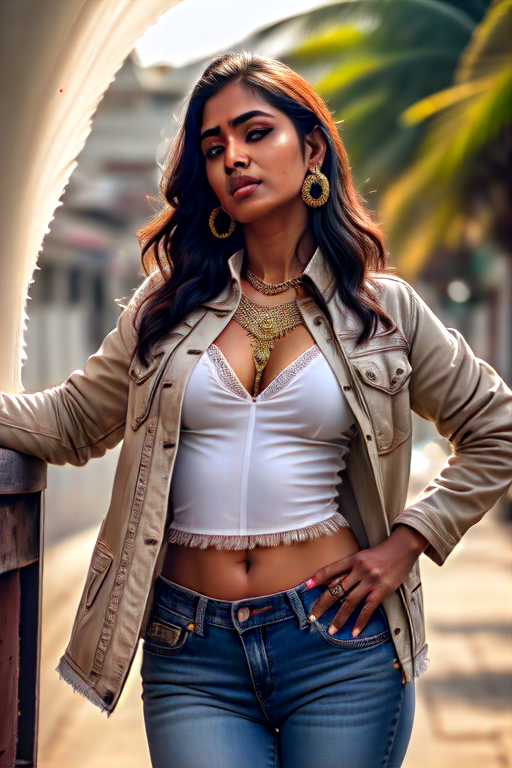

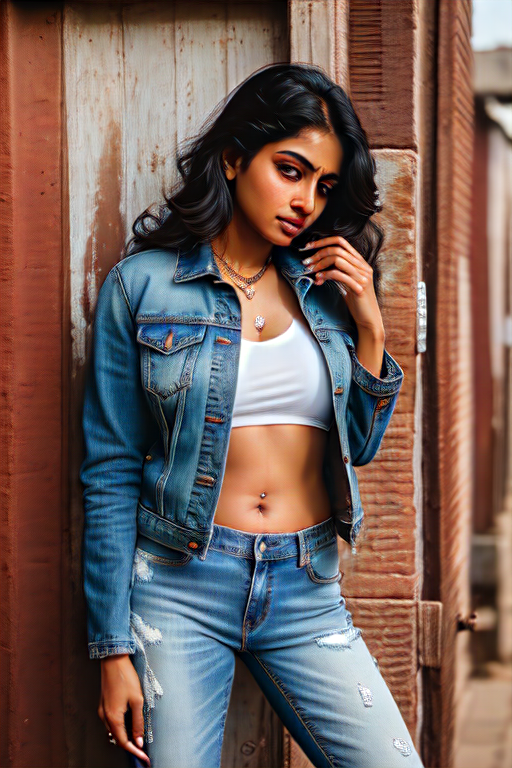

In [35]:
g_cuda = torch.Generator(device='cuda')
seed = 4248775099 #@param {type:"number"}
g_cuda.manual_seed(seed)
#@title Run for generating images.

prompt = "beautiful indian woman wearing jeans and jacket, gorgeous, detailed face , high quality, intricate, ultra realistic, beautiful hair,  depth of field, 8k uhd, dslr, soft lighting, detailed skin, skin pores, 8k uhd, dslr, soft lighting, high quality, film grain, Fujifilm XT3" #@param {type:"string"}
negative_prompt = "(worst quality:1.4), (low quality:1.4), child, deformed, deformed face, bad hands, bad fingers, bad hands, (3d, render, cgi, doll, painting:1.4), long body, blurry, duplicate, cloned, duplicate body parts, disfigured, extra limbs, fused fingers, extra fingers, twisted, malformed hands, mutated hands and fingers, conjoined, missing limbs, bad anatomy, bad proportions, logo, signature, text, words, lowres, boring, mutated, artifacts, gross, ugly, stretch, smooth skin texture" #@param {type:"string"}
num_samples = 2 #@param {type:"number"}
guidance_scale = 8 #@param {type:"number"}
num_inference_steps = 20 #@param {type:"number"}
height = 768 #@param {type:"number"}
width = 512 #@param {type:"number"}

with autocast("cuda"), torch.inference_mode():
    images = pipe(
        [prompt]*2,
        pose,
        height=height,
        width=width,
        negative_prompt=[negative_prompt]*2,
        #num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda
    ).images

for img in images:
    display(img)